# Customer segmentation

In [74]:
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# %matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances

# pip install reval

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

# !pip install coclust
# from coclust.clustering import SphericalKmeans

# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from ipywidgets import interact
# import ipywidgets as widgets

# import geopandas

import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall_mini_project.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns = {'Genre':'Gender'}, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [8]:
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

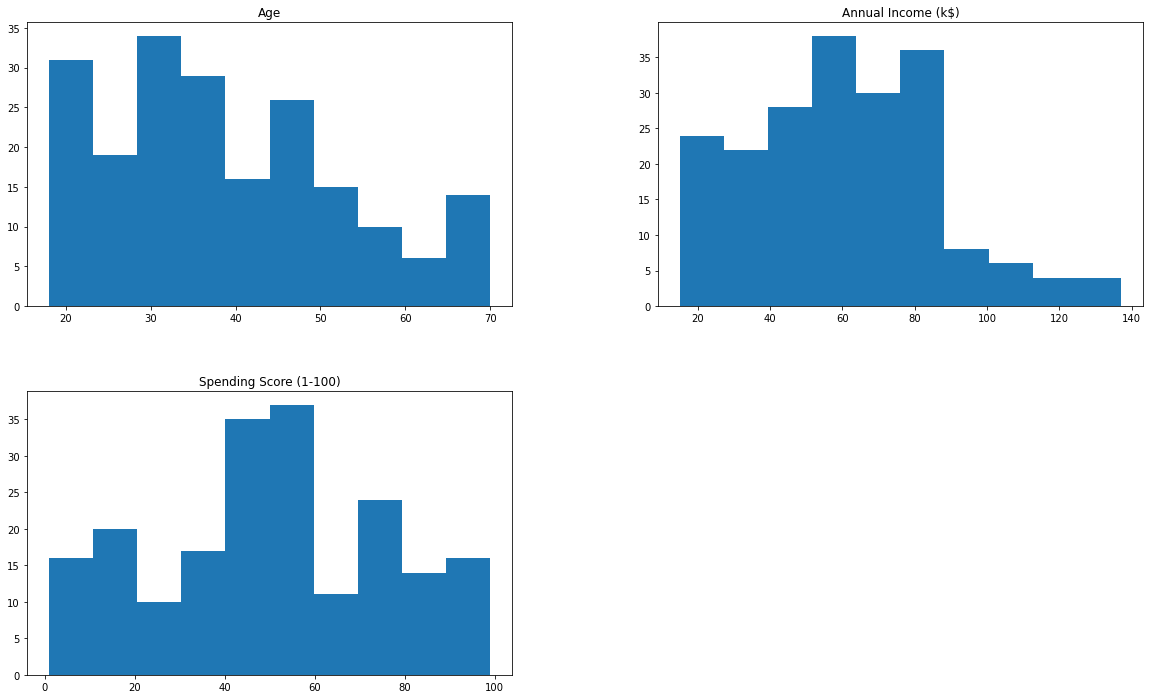

In [9]:
plt.rcParams["figure.figsize"] = [20,12]
df.hist(bins = 10, grid = False);

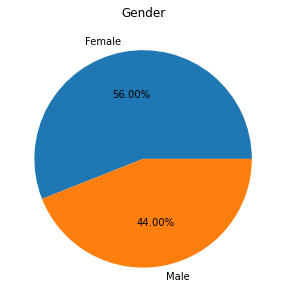

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

ax.set_title('Gender')
percentage = df['Gender'].value_counts()
label = list(df['Gender'].value_counts().index)
ax.pie(percentage, labels = label, autopct = '%0.2f%%')

plt.show();

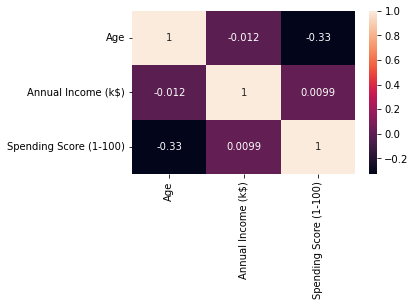

In [11]:
fig, ax = plt.subplots(figsize = (5, 3))
sb.heatmap(df.corr(), annot = True);

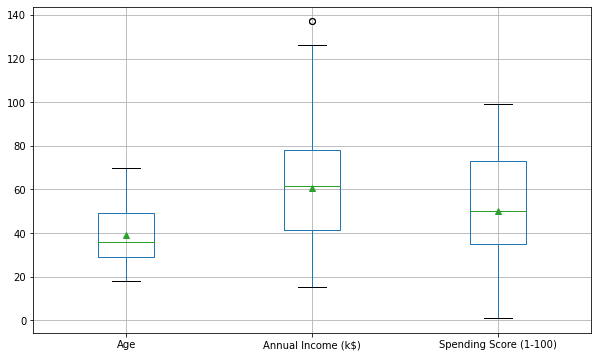

In [12]:
fig = plt.subplots(figsize = (10,6))
df.boxplot(showmeans = True)
plt.show()

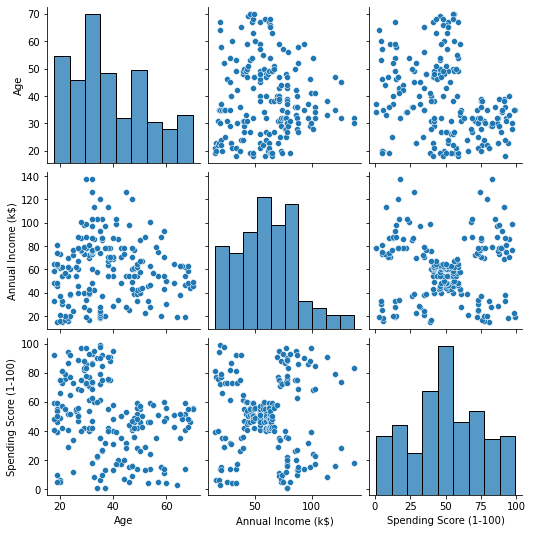

In [13]:
sb.pairplot(df);

###### 

### Pre-process data

In [14]:
df_m = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']][df.Gender == 'Male']
df_f = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']][df.Gender == 'Female']

### Model building, training and evaluating its performance

### K-Means algorithm

#### Finding the optimum value of K using Elbow Method

In [34]:
# X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].values
dff = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
np.random.seed(42)

In [128]:
clusterer = KMeans(n_clusters = 2).fit(X)
cluster_labels = clusterer.predict(X)
labels = clusterer.labels_
ch = round(metrics.calinski_harabasz_score(X, labels),4)
ch_k.append(ch)
print(ch)
silhouette_avg = round(silhouette_score(X, cluster_labels),4)
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

96.7465
For n_clusters = 8 The average silhouette_score is : 0.2969


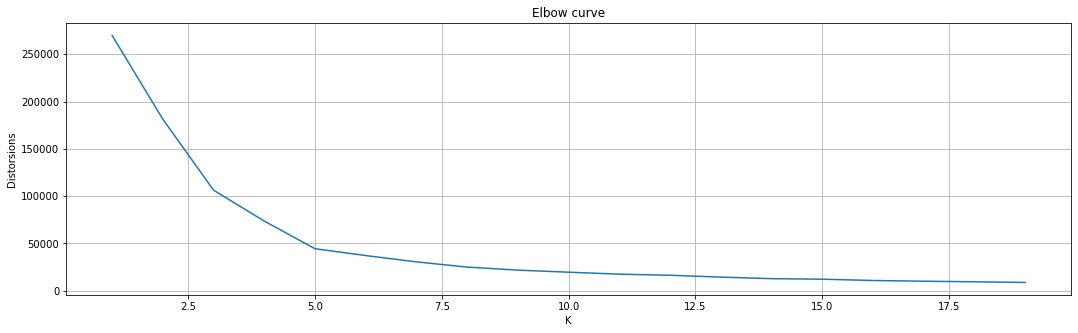

In [35]:
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize = (18, 5))
plt.plot(range(1, 20), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

#### Finding the optimum value of K and cluster efficiency using Silhouette Score, k = 5

In [149]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
s_k = []
ch_k = []

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    labels = clusterer.labels_
    ch = round(metrics.calinski_harabasz_score(X, labels),4)
    ch_k.append(ch)

    silhouette_avg = round(silhouette_score(X, cluster_labels),4)
    s_k.append(silhouette_avg)

In [150]:
s_df_k = pd.DataFrame(list(zip(range_n_clusters, s_k, ch_k)), columns = ['Cluster', 'Silhoutte score', 'ch_index'])
s_df_k

,Cluster,Silhoutte score,ch_index
0,2,0.2969,96.7465
1,3,0.4676,151.5570
2,4,0.4932,174.0644
3,5,0.5539,247.3590
4,6,0.5376,242.2503
5,7,0.5288,255.0030
6,8,0.4579,268.6265


In [ ]:
def plot(a, b):
    X = df[[a,b]].values
    t0 = time.time()
    model = KMeans(n_clusters = 5)
    model.fit(X)
    t1 = time.time()
    y_k = model.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_k == 0, 0], X[y_k == 0, 1], s = 10, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_k == 1, 0], X[y_k == 1, 1], s = 10, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_k == 2, 0], X[y_k == 2, 1], s = 10, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_k == 3, 0], X[y_k == 3, 1], s = 10, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_k == 4, 0], X[y_k == 4, 1], s = 10, c = 'green', label = 'Cluster-5')
    ax.set_title('Clusters of male customers - k')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )
   
plot('Annual Income (k$)', 'Spending Score (1-100)')
plot('Age', 'Annual Income (k$)')
plot('Age', 'Spending Score (1-100)')

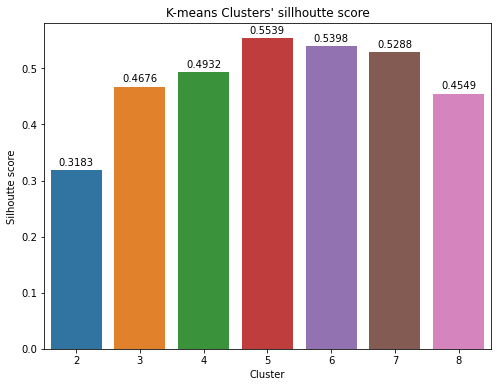

In [115]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
pt = sb.barplot(data = s_df, x = s_df_k['Cluster'], y = s_df_k['Silhoutte score'])
for bar in pt.patches:
    pt.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("K-means Clusters' sillhoutte score");

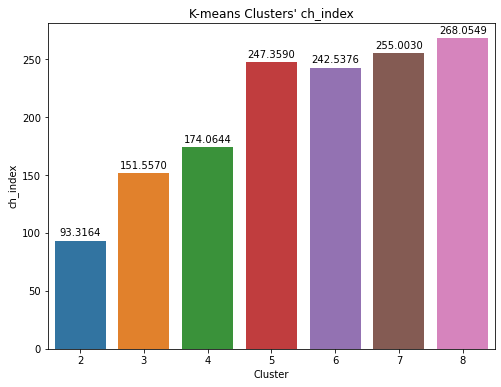

In [116]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
pt = sb.barplot(data = s_df, x = s_df_k['Cluster'], y = s_df_k['ch_index'])
for bar in pt.patches:
    pt.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("K-means Clusters' ch_index");

### k = 5

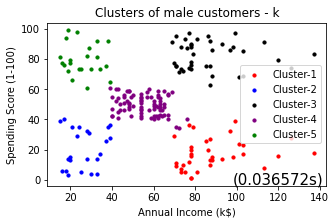

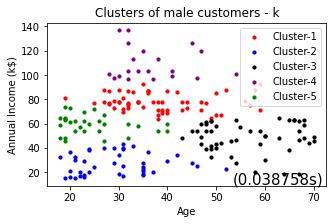

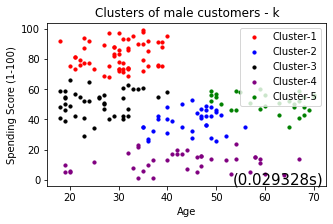

In [121]:
def plot(a, b):
    X = df[[a,b]].values
    t0 = time.time()
    model = KMeans(n_clusters = 5)
    model.fit(X)
    t1 = time.time()
    y_k = model.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_k == 0, 0], X[y_k == 0, 1], s = 10, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_k == 1, 0], X[y_k == 1, 1], s = 10, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_k == 2, 0], X[y_k == 2, 1], s = 10, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_k == 3, 0], X[y_k == 3, 1], s = 10, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_k == 4, 0], X[y_k == 4, 1], s = 10, c = 'green', label = 'Cluster-5')
    ax.set_title('Clusters of male customers - k')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )

    
plot('Annual Income (k$)', 'Spending Score (1-100)')
plot('Age', 'Annual Income (k$)')
plot('Age', 'Spending Score (1-100)')

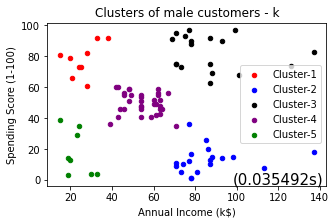

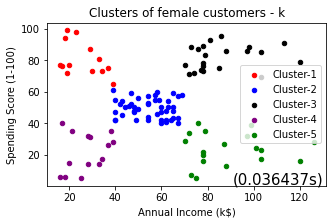

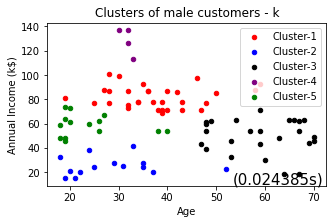

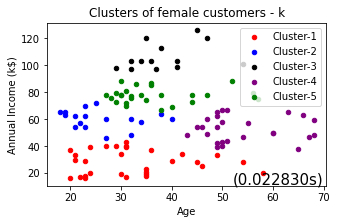

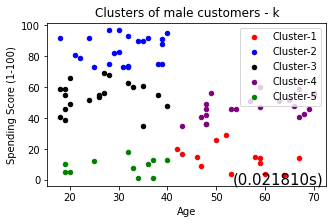

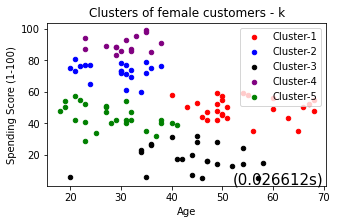

In [123]:
def plot(a, b):
    X = df_m[[a,b]].values
    t0 = time.time()
    model = KMeans(n_clusters = 5)
    model.fit(X)
    t1 = time.time()
    y_k = model.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_k == 0, 0], X[y_k == 0, 1], s = 20, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_k == 1, 0], X[y_k == 1, 1], s = 20, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_k == 2, 0], X[y_k == 2, 1], s = 20, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_k == 3, 0], X[y_k == 3, 1], s = 20, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_k == 4, 0], X[y_k == 4, 1], s = 20, c = 'green', label = 'Cluster-5')
    ax.set_title('Clusters of male customers - k')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )
    
    X = df_f[[a,b]].values
    t0 = time.time()
    model = KMeans(n_clusters = 5)
    model.fit(X)
    t1 = time.time()
    y_k = model.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_k == 0, 0], X[y_k == 0, 1], s = 20, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_k == 1, 0], X[y_k == 1, 1], s = 20, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_k == 2, 0], X[y_k == 2, 1], s = 20, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_k == 3, 0], X[y_k == 3, 1], s = 20, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_k == 4, 0], X[y_k == 4, 1], s = 20, c = 'green', label = 'Cluster-5')
    ax.set_title('Clusters of female customers - k')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )
    
plot('Annual Income (k$)', 'Spending Score (1-100)')
plot('Age', 'Annual Income (k$)')
plot('Age', 'Spending Score (1-100)')

###### 

### Agglomerative hierarchical algorithm

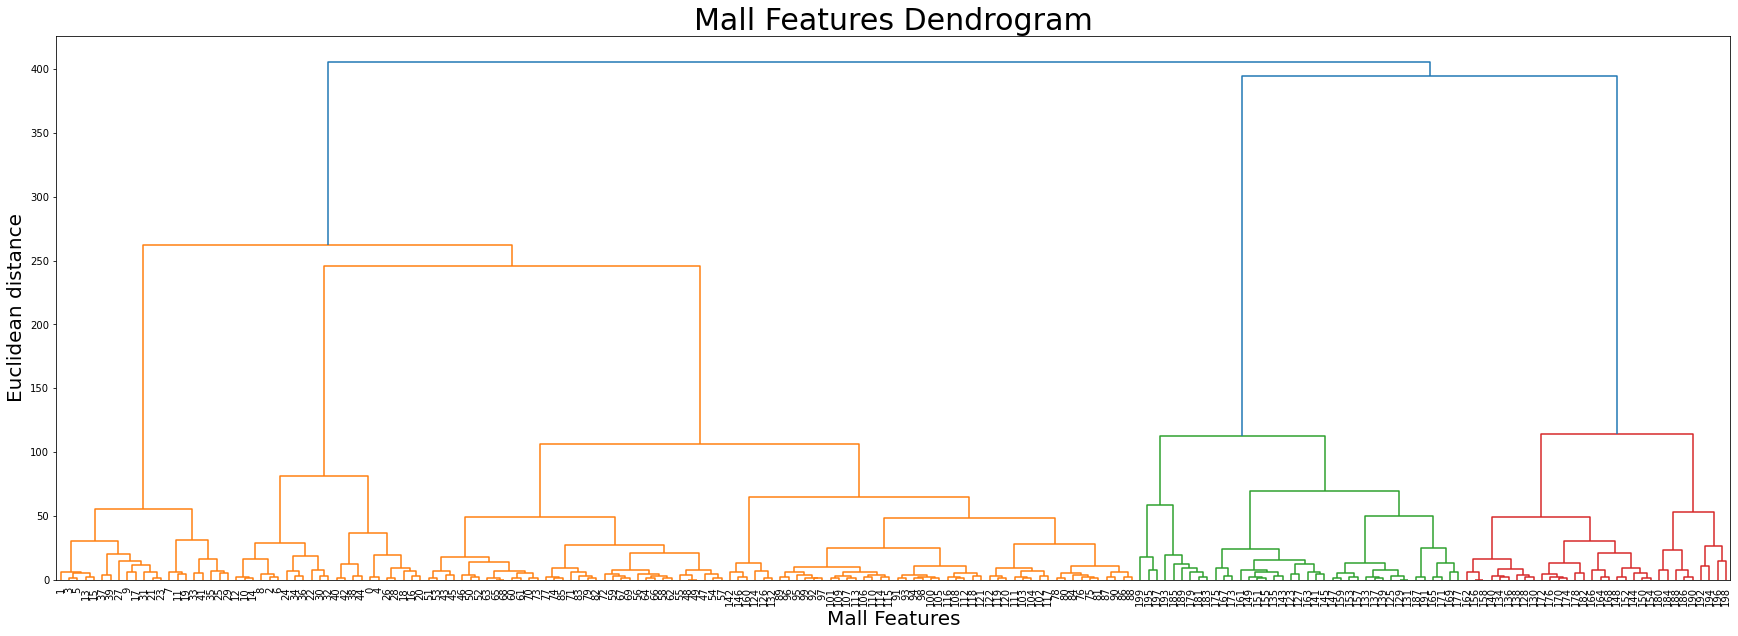

In [41]:
plt.figure(figsize = (30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'), labels = dff.index)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 10)
plt.title('Mall Features Dendrogram',fontsize = 30)
plt.xlabel('Mall Features',fontsize = 20)
plt.ylabel('Euclidean distance', fontsize = 20)
plt.show()

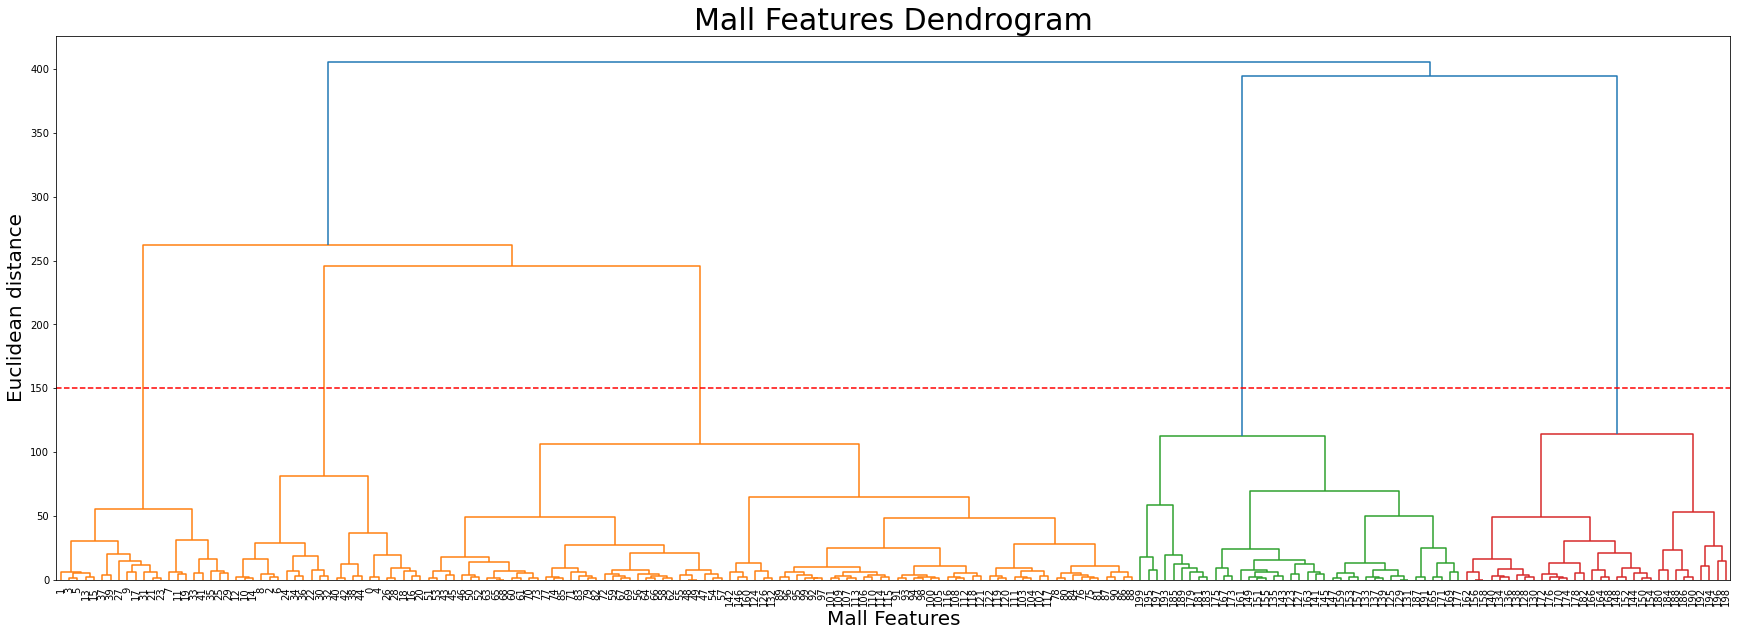

In [47]:
plt.figure(figsize = (30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'), labels = df.index)
plt.axhline(y = 150, color = 'r', linestyle = '--')
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 10)
plt.title('Mall Features Dendrogram',fontsize = 30)
plt.xlabel('Mall Features',fontsize = 20)
plt.ylabel('Euclidean distance', fontsize = 20)
plt.show()

In [90]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
s_a = []
ch_a = []

for n_clusters in range_n_clusters:

    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = clusterer.fit_predict(X)
    labels = clusterer.labels_
    ch = round(metrics.calinski_harabasz_score(X, labels),4)
    print(ch)
    ch_a.append(ch)

    silhouette_avg = round(silhouette_score(X, cluster_labels),4)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    s_a.append(silhouette_avg)

86.7946
For n_clusters = 2 The average silhouette_score is : 0.3671
143.8195
For n_clusters = 3 The average silhouette_score is : 0.4618
168.9924
For n_clusters = 4 The average silhouette_score is : 0.4917
243.0714
For n_clusters = 5 The average silhouette_score is : 0.553
232.4642
For n_clusters = 6 The average silhouette_score is : 0.538
237.0959
For n_clusters = 7 The average silhouette_score is : 0.5199
251.3255
For n_clusters = 8 The average silhouette_score is : 0.4326


In [91]:
s_df_a = pd.DataFrame(list(zip(range_n_clusters, s_a, ch_a)), columns = ['Cluster', 'Silhoutte score', 'ch_index'])
s_df_a

,Cluster,Silhoutte score,ch_index
0,2,0.3671,86.7946
1,3,0.4618,143.8195
2,4,0.4917,168.9924
3,5,0.5530,243.0714
4,6,0.5380,232.4642
5,7,0.5199,237.0959
6,8,0.4326,251.3255


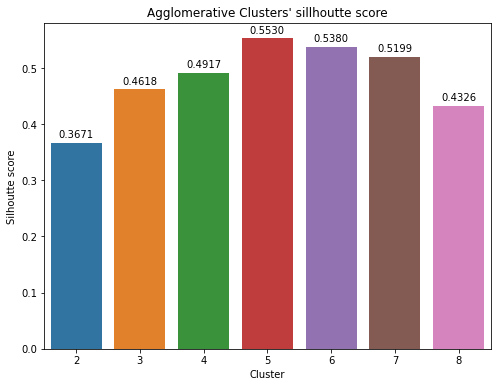

In [118]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
pt = sb.barplot(data = s_df, x = s_df_a['Cluster'], y = s_df_a['Silhoutte score'])
for bar in pt.patches:
    pt.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Agglomerative Clusters' sillhoutte score");

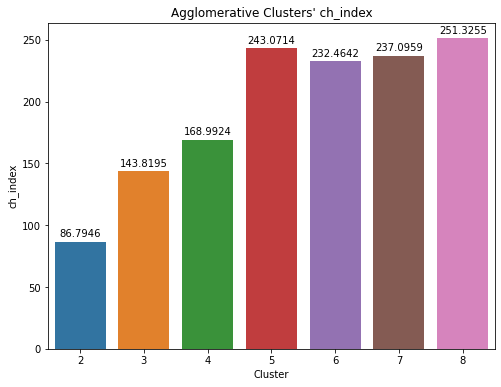

In [119]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
pt = sb.barplot(data = s_df, x = s_df_a['Cluster'], y = s_df_a['ch_index'])
for bar in pt.patches:
    pt.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Agglomerative Clusters' ch_index");

### k = 5

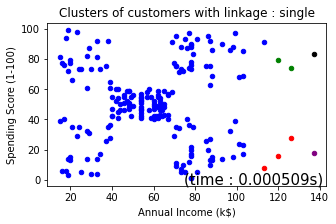

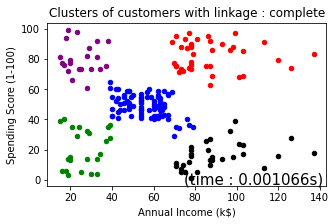

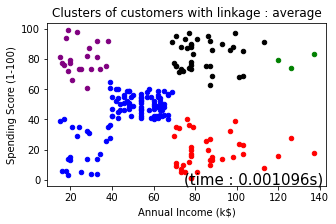

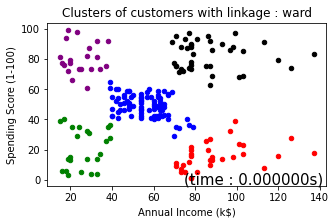

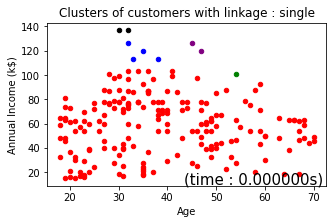

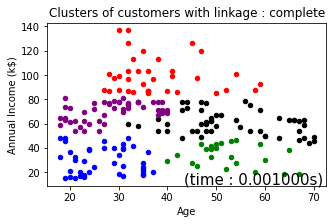

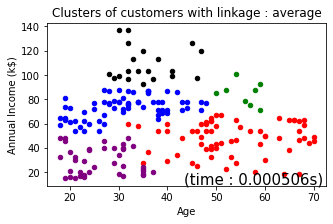

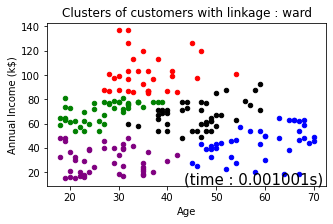

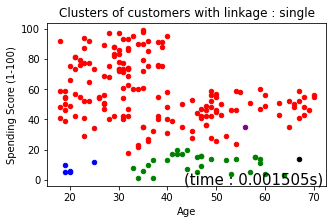

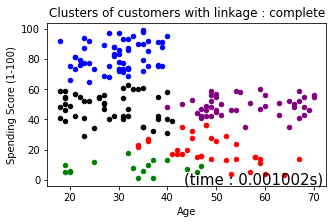

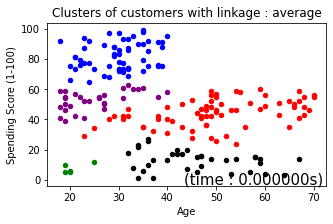

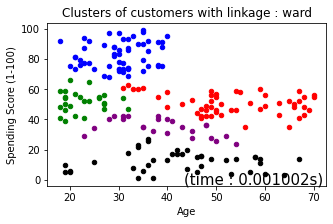

In [59]:
def plot(a, b):
    X = df[[a,b]].values
    l = ['single', 'complete', 'average', 'ward']
    for i in l:
#         print('linkage = ', i)
        t0 = time.time()
        hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = i).fit(X)
        t1 = time.time()
        y_hc = hc.fit_predict(X) 
        fig, ax = plt.subplots(figsize = (5, 3))
        ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Cluster-1')
        ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Cluster-2')
        ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'black', label = 'Cluster-3')
        ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 20, c = 'purple', label = 'Cluster-4')
        ax.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 20, c = 'green', label = 'Cluster-5')
#         ax.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 20, c = 'yellow', label = 'Cluster-6')
        ax.set_title('Clusters of customers with linkage : ' + i)
        ax.set_xlabel(a)
        ax.set_ylabel(b)
        plt.text(
        0.99,
        0.01,
        ("(time : %.6fs)" % (t1 - t0)),
        transform = plt.gca().transAxes,
        size = 15,
        horizontalalignment = "right",
        )

plot('Annual Income (k$)', 'Spending Score (1-100)')
plot('Age', 'Annual Income (k$)')
plot('Age', 'Spending Score (1-100)')

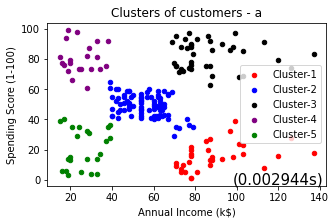

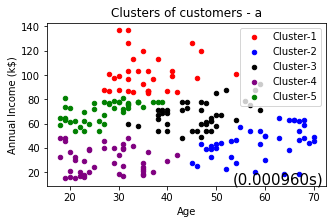

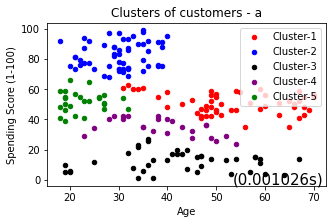

In [125]:
def plot(a, b):
    X = df[[a,b]].values
    t0 = time.time()
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(X)
    t1 = time.time()
    y_hc = hc.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 20, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 20, c = 'green', label = 'Cluster-5')
#         ax.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 20, c = 'yellow', label = 'Cluster-6')
    ax.set_title('Clusters of customers - a')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )
        
plot('Annual Income (k$)', 'Spending Score (1-100)')
plot('Age', 'Annual Income (k$)')
plot('Age', 'Spending Score (1-100)')

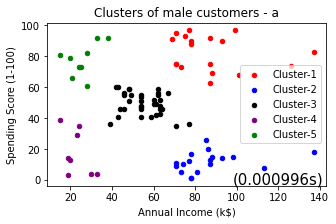

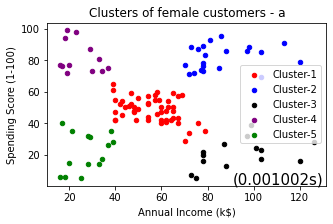

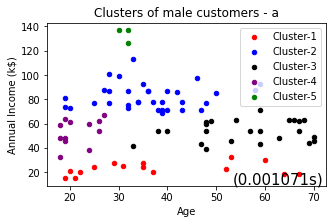

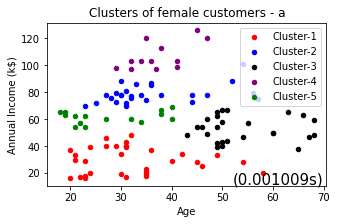

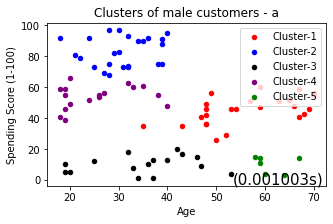

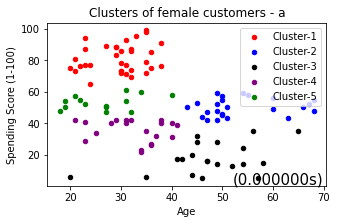

In [126]:
def plot(a, b):
    X = df_m[[a,b]].values
    t0 = time.time()
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(X)
    t1 = time.time()
    y_hc = hc.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 20, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 20, c = 'green', label = 'Cluster-5')
#         ax.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 20, c = 'yellow', label = 'Cluster-6')
    ax.set_title('Clusters of male customers - a')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )
        
    X = df_f[[a,b]].values
    t0 = time.time()
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(X)
    t1 = time.time()
    y_hc = hc.fit_predict(X) 
    fig, ax = plt.subplots(figsize = (5, 3))
    ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Cluster-1')
    ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Cluster-2')
    ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'black', label = 'Cluster-3')
    ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 20, c = 'purple', label = 'Cluster-4')
    ax.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 20, c = 'green', label = 'Cluster-5')
#    ax.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 20, c = 'yellow', label = 'Cluster-6')
    ax.set_title('Clusters of female customers - a')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    plt.legend()
    plt.text(
    0.99,
    0.01,
    ("(%.6fs)" % (t1 - t0)),
    transform = plt.gca().transAxes,
    size = 15,
    horizontalalignment = "right",
    )

plot('Annual Income (k$)', 'Spending Score (1-100)')
plot('Age', 'Annual Income (k$)')
plot('Age', 'Spending Score (1-100)')

### Conclusion – Best model : 

    Both models provide good clusters.

    Agglomerative is the best model (time taken - wise) for segmenting mall customers for the given dataset.

### Business Insights :
    1) Why males spend less than females
    2) (In terms of sales) Special attention should be paid to customers of both genders having:
    3) High income and high spending score – Target audience(1)
    4) 30 - 50 age and high annual income – Target audience(2)
    5) < 40 age and low spending score – Target audience(3)

###### 